In [3]:
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm
import numpy as np
import random
import time

In [2]:
def initDF():
    # INIT
    dff = pd.read_csv('imdb_dataset.tsv', sep='\t', header=None, dtype=str)
    edges = dff.to_records(index=False)
    dff[2] = dff[1].str.extract(r'(\(\d{4})', expand=True)#.str.replace("(", "").fillna(0).astype(int) #FIXME fillna is pretty ugly rn
    dff[2] = dff[2].str.replace("(", "", regex=False).fillna(0).astype(int)
    dff = dff.rename(columns={0: "actor", 1: "movie", 2: "year"})
    dff.loc[dff['movie'] == 'Re']
    dff['movie'] = dff['movie'].replace(['Re'],'Re ')
    dff['movie'] = dff['movie'].replace(['Regen'], 'Regen ')
    return dff
    

In [3]:
def generateIMDBGraph(in_df):
    '''
    Generates bipartite (0 is actor, 1 is movie) graph of which nodes are 
    movies and actors, and an edge is present if an actor participated in a movie
    Arguments: 
        in_df: dataframe of which columns are (index, actor, movie)
    Returns: 
        Tuple: 
            - graph: graph in which nodes are numerical (and not string)
            - original_graph: graph in which the nodes are a string
            - actor_nodes_f: the list of indices representing the nodes that are of type actor
            - movies_nodes_f: the list of indices representing the nodes that are of type movie
            - actors_f: list of actors (strings)
            - movies_f: list of movies (string)
            
    '''
    in_df = pd.read_csv('imdb_dataset.tsv', sep='\t', header=None, dtype=str)
    edges = in_df.to_records(index=False)
    in_df[2] = in_df[1].str.extract(r'(\(\d{4})', expand=True)#.str.replace("(", "").fillna(0).astype(int) #FIXME fillna is pretty ugly rn
    in_df[2] = in_df[2].str.replace("(", "", regex=False).fillna(0).astype(int)
    in_df = in_df.rename(columns={0: "actor", 1: "movie", 2: "year"})
    in_df.loc[in_df['movie'] == 'Re']
    in_df['movie'] = in_df['movie'].replace(['Re'],'Re ')
    in_df['movie'] = in_df['movie'].replace(['Regen'], 'Regen ')
    actors_f = in_df.actor.unique()
    movies_f = in_df.movie.unique()
    movies_dict = in_df.drop(columns='actor').drop_duplicates().set_index('movie').to_dict('index')
    movies_tuples_list = [(k, v) for k, v in movies_dict.items()] #ugly but convenient for what networkx expects
    original_graph = nx.Graph()
    original_graph.add_nodes_from(actors_f, bipartite = 0) #attribute bipartite following documentation recommendations. In this case 0 is actors_f, 1 is movies_f
    print(f"Number of nodes after adding actors_f is {original_graph.number_of_nodes()}")
    original_graph.add_nodes_from(movies_tuples_list, bipartite = 1)
    print(f"Number of nodes after adding movies_f is {original_graph.number_of_nodes()}") 
    original_graph.add_edges_from(edges)
    graph = nx.convert_node_labels_to_integers(original_graph, label_attribute='original_name')
    actor_nodes_f = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
    movies_nodes_f = set(graph) - actor_nodes_f
    return (graph, original_graph, actor_nodes_f, movies_nodes_f, actors_f, movies_f)

df = pd.read_csv('imdb_dataset.tsv', sep='\t', header=None, dtype=str)
G, oriGinal, actor_nodes, movies_nodes, actors_f, movies_f = generateIMDBGraph(df)


Number of nodes after adding actors_f is 2364796
Number of nodes after adding movies_f is 3110737


In [2]:
#df = pd.read_csv('imdb_dataset.tsv', sep='\t', header=None, dtype=str)
#print(df.dtypes)

0    object
1    object
dtype: object


In [3]:
edges = df.to_records(index=False)

In [4]:
df[2] = df[1].str.extract(r'(\(\d{4})', expand=True)#.str.replace("(", "").fillna(0).astype(int) #FIXME fillna is pretty ugly rn
df[2] = df[2].str.replace("(", "", regex=False).fillna(0).astype(int)


In [5]:
#https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html
# I think the simple regex is sufficient
df = df.rename(columns={0: "actor", 1: "movie", 2: "year"})

In [6]:
print(df[df['year'].isnull()])

Empty DataFrame
Columns: [actor, movie, year]
Index: []


In [7]:
df[13500:13505]

,actor,movie,year
13500,"Abud, Machfud",Darah perjaka (1985),1985
13501,"Abud, Machfud",Perawan disarang sindikat (1987),1987
13502,"Abud, Machfud",Siluman kera (1988),1988
13503,"Abud, Machfud",Tarzan raja rimba (1989),1989
13504,"Abud, Mariano",Un Bu?uel mexican (1997),1997


In [10]:
actors = df.actor.unique()
movies = df.movie.unique()
print(f"Number of actors is: {len(actors)} \nNumber of movies is: {len(movies)} \nTotal nodes will be: {actors.size + movies.size}")
print(f"Number of edges is will be: {len(edges)}")


Number of actors is: 2364796 
Number of movies is: 745941 
Total nodes will be: 3110737
Number of edges is will be: 8104335


In [11]:
movies_dict = df.drop(columns='actor').drop_duplicates().set_index('movie').to_dict('index')
movies_tuples_list = [(k, v) for k, v in movies_dict.items()] #ugly but convenient for what networkx expects

In [12]:
movies_tuples_list

[('Nykytaiteen museo (1986)', {'year': 1986}),
 ('Suuri illusioni (1985)', {'year': 1985}),
 ('E.R. Sluts (2003) (V)', {'year': 2003}),
 ('American Pimp (1999)', {'year': 1999}),
 ('Beats, Rhymes & Life: The Travels of a Tribe Called Quest (2011)',
  {'year': 2011}),
 ('Gangsta Rap: The Glockumentary (2007)', {'year': 2007}),
 ('Get It Where You Fit in 1 (2003) (V)', {'year': 2003}),
 ('Ghetto Physics (2010)', {'year': 2010}),
 ('Ghostride the Whip (2008) (V)', {'year': 2008}),
 ('Hip Hop Uncensored Vol. 4: Miami Vice (2002) (V)', {'year': 2002}),
 ('Menace II Society (1993)', {'year': 1993}),
 ('Ozone West 3 (2009) (V)', {'year': 2009}),
 ('Pimpalation: Return of the Trill (2006)', {'year': 2006}),
 ('Planet Rock: The Story of Hip-Hop and the Crack Generation (2011) (TV)',
  {'year': 2011}),
 ('Porndogs: The Adventures of Sadie (2009)', {'year': 2009}),
 ('Rhyme & Reason (1997)', {'year': 1997}),
 ('Scarface: Greatest Hits on DVD (2003) (V)', {'year': 2003}),
 ('Stop Pepper Palmer (20

In [13]:
oriGinal = nx.Graph()
oriGinal.add_nodes_from(actors, bipartite = 0) #attribute bipartite following documentation recommendations. In this case 0 is actors, 1 is movies
print(f"Number of nodes after adding actors is {oriGinal.number_of_nodes()}")
oriGinal.add_nodes_from(movies_tuples_list, bipartite = 1)
print(f"Number of nodes after adding movies is {oriGinal.number_of_nodes()}") 
      

Number of nodes after adding actors is 2364796
Number of nodes after adding movies is 3110737


In [60]:
# alternative to cell above
if False:
    oriGinal = nx.Graph()
    oriGinal.add_nodes_from(actors, bipartite = 0) #attribute bipartite following documentation recommendations. In this case 0 is actors, 1 is movies
    num_node_actors = oriGinal.number_of_nodes()
    print(f"Number of nodes after adding actors is {num_node_actors}")
    regens = []
    i = 0
    dump = None
    first = True
    second = True
    for nd in tqdm(movies_tuples_list):
        if nd[0] == 'Foundation of a Movie (2008)':
            regens.append(nd)
        oriGinal.add_node(nd[0], bipartite = 1, year = nd[1]['year'])
        i+=1
        if oriGinal.number_of_nodes() == i + num_node_actors -1 and first:
            print(f"Just tried to add {nd}, iteration {i}")
            first = False
        if oriGinal.number_of_nodes() == i + num_node_actors - 2 and second:
            print(f"Just tried to add {nd}, iteration {i}")
            second = False
        if nd[0] == 'Regen' or nd[0] == 'Re':
            print(f"->{nd}")
        if nd[1]['year'] == 10000:
            print(f"@@ {nd}")
    print(f"num iterations {i}")

    print(f"Number of nodes after adding movies is {oriGinal.number_of_nodes()}") #???????
    print(f"Number of actor nodes is {num_node_actors}, number of iterations is {i}, sum is {num_node_actors + i}")
      

In [14]:
print(movies_tuples_list[68079])


('Foundation of a Movie (2008)', {'year': 2008})


In [15]:
oriGinal.add_edges_from(edges)
print(oriGinal.number_of_edges())

8103960


In [16]:
G = nx.convert_node_labels_to_integers(oriGinal, label_attribute='original_name')

In [9]:
actor_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
movies_nodes = set(G) - actor_nodes
print(actor_nodes)

NameError: name 'G' is not defined

In [17]:
print(G[400000])

{2372152: {}, 2514502: {}}


In [18]:
#TODO asserts
print(f"Number of actor nodes: {len(actor_nodes)}")
print(f"Number of movies nodes: {len(movies_nodes)}")
print(f"Total number of nodes: {len(actor_nodes) + len(movies_nodes)}")

print(f"#Nodes? {oriGinal.number_of_nodes() == G.number_of_nodes()}")
print(f"#Edges? {oriGinal.number_of_edges() == G.number_of_edges()}")

Number of actor nodes: 2364796
Number of movies nodes: 745941
Total number of nodes: 3110737
#Nodes? True
#Edges? True


In [19]:
print(oriGinal)

Graph with 3110737 nodes and 8103960 edges


In [22]:
print(oriGinal["'t Hoen, Dani?l"])
print(oriGinal["'Kid Niagara' Kallet, Harry"])

print(G[2151046])

nodes_data = G.nodes.data(True)
print(nodes_data[2365734])

{'Zonde (2010)': {}}
{'Drug Demon Romance (2012)': {}}
{25695: {}, 207265: {}, 457200: {}, 472789: {}, 1009276: {}, 1140040: {}, 1486377: {}, 1751991: {}, 2036767: {}, 2816091: {}, 2313367: {}}
{'bipartite': 1, 'year': 2011, 'original_name': 'To Meet It with Awe (2011)'}


In [ ]:
original_data = oriGinal.nodes.data(True)
print(original_data['To Meet It with Awe (2011)'])

In [ ]:
G.size

In [23]:
len(degree_hist)

1883

In [22]:
degree_hist = nx.degree_histogram(G)

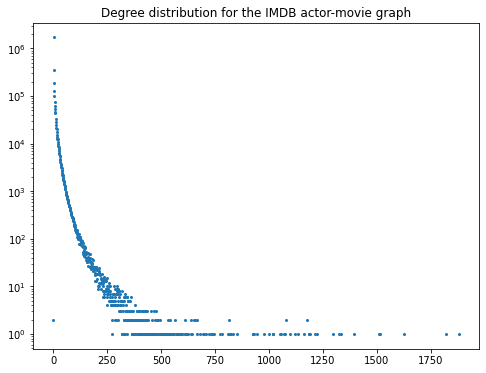

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
degree_hist = nx.degree_histogram(G)
figure(figsize=(8, 6))
x_len = 1883
x = range(0,x_len)
y = np.array(degree_hist[0:x_len])
plt.title("Degree distribution for the IMDB actor-movie graph")
plt.scatter(x, y, s=4)
plt.yscale('log')
plt.show()

## Question 1
G) Considering only the movies up to year x with x in {1930,1940,1950,1960,1970,1980,1990,2000,2010,2020}, write a function which, given x, computes the average number of movies per actor up to year x. 

In [22]:
def avgMoviesPerActorUpToYear(graph, act_nodes, mv_nodes, year):
    '''
    Given 'year' returns the average number of movies in which an actor participated in.
    Arguments: 
        graph: the IMDB graph (numerical version)
        act_nodes: indices of nodes which are of type actor (kept in memory so that doesn't have to be calculated each time)
        mv_nodes: indices of nodes which are of type movie
        year: year up to which calculation is made
    Returns: 
        year: year taken into consideration
        mean1: mean taking into consideration the whole set of actor nodes (even unborn and dead ones)
        mean2: mean taking into consideration only the actors that made at least one movie in the considered period
    '''
    # get movies nodes up to a certain year
    movies_up_to_year = {x for x,y in graph.nodes(data=True) if y['bipartite'] == 1 and y['year'] <= year}
    # 
    nodes_subset = movies_up_to_year.union(act_nodes) 
    # We have two ways of interpreting the question. One is to consider actors even when they've zero movies, the 
    # other is to consider actors only when they have a non zero counter. Regardless, this is considered later
    subgraph = graph.subgraph(nodes_subset)
    assert subgraph.number_of_nodes() == len(nodes_subset)
    
    subgraph_actor_nodes = {n for n, d in subgraph.nodes(data=True) if d["bipartite"] == 0} #in this case it's not necessary because actors are first nodes (in order), but what I said is not a given
    
    degrees = subgraph.degree(nbunch = subgraph_actor_nodes)
    deg_data = pd.DataFrame(degrees)
    #print(deg_data[1])
    sol = (year, deg_data[1].mean(), deg_data[1].replace(0, np.NaN).mean()) #convenient for output later
    #print(f"Mean: {sol[1]}")
    #print(f"Mean removing zeros: {sol[2]}")
    return sol
    
    #print(a)

In [23]:
print(avgMoviesPerActorUpToYear(G, actor_nodes, movies_nodes, 1970))

(1970, 0.7823960290866527, 6.344669016789203)


In [24]:
q1_results = []
for year in tqdm(range(1930, 2021, 10)):
    q1_results.append(avgMoviesPerActorUpToYear(G, actor_nodes, movies_nodes, year))


  0%|          | 0/10 [00:00<?, ?it/s]

   Year  Average 1  Average 2
0  1930   0.163273   6.789769
1  1940   0.300382   7.355874
2  1950   0.426567   7.533169
3  1960   0.583358   7.018147
4  1970   0.782396   6.344669
5  1980   1.029404   5.626963
6  1990   1.349234   4.924729
7  2000   1.813019   4.356106
8  2010   2.912012   3.624233
9  2020   3.426922   3.426922


<AxesSubplot:title={'center':'Average number of movies per year'}, xlabel='Year'>

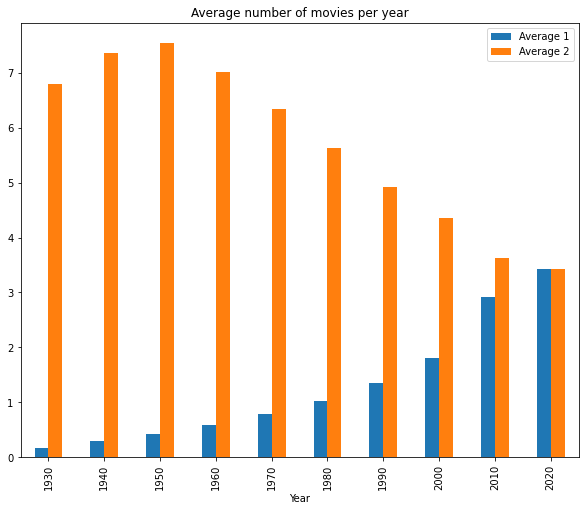

In [34]:
q1_df = pd.DataFrame(q1_results).rename(columns={0: "Year", 1: "Average 1", 2: "Average 2"})
print(q1_df)
q1_df.plot.bar(x="Year", y=["Average 1", "Average 2"], title="Average number of movies per year", figsize=(10,8))


## Question 2
3) Considering only the movies up to year x with x in {1930,1940,1950,1960,1970,1980,1990,2000,2010,2020} and restricting to the largest connected component of the graph. Approximate the closeness centrality for each node. Who are the top-10 actors?

[Fast Approximation of Centrality (D. Eppstein, J. Wang)](https://www.ics.uci.edu/~eppstein/pubs/EppWan-SODA-01.pdf)
```
*Pseudocode
1. Let k be the number of iterations needed to obtain the desired error bound
2. In iteration i, pick vertex v_i uniformly at random from G and solve the SSSP problem with v_i as a source. 
3. Let (1) be the centrality estimator for vertex u
```
Where  
(1)  $\hat{c}_u = \frac{1}{\sum_{i=1}^k \frac{n*d(v_i, u)}{k(n-1)}}$

In [19]:
def closenessCentralityUpToYear(graph, act_nodes, year, k = None, epsilon = None):
    '''
    Approximates closeness centrality of graph
    Arguments:
        graph: input graph (numerical values of nodes)
        act_nodes: indices of nodes that are of type actor
        year: year up to which the centrality is wanted
        [k]: number of iterations, compulsory if epsilon is not specified
        [epsilon]: error bound for the centrality estimate (Azuma-Hoeffding epsilon)
    Returns:
        distances_df: dataframe containing the distances of the sampled nodes, and the calculated centrality
        epsilon: epsilon of input (can be None)
        k: k of input
    
    '''
    movies_up_to_year = {x for x,y in graph.nodes(data=True) if y['bipartite'] == 1 and y['year'] <= year}
    nodes_subset = movies_up_to_year.union(act_nodes) 
    cc_subgraph = graph.subgraph(nodes_subset)
    largest_cc = max(nx.connected_components(cc_subgraph), key=len) # get largest CC 
    cc_subgraph = graph.subgraph(largest_cc)
    assert cc_subgraph.number_of_nodes() == len(largest_cc)
    
    if epsilon is not None:
        import math
        k = math.ceil(math.log(cc_subgraph.number_of_nodes())/math.pow(epsilon, 2)) #FIXME: this calculation has to be done on the subgraph
        print(f"Corresponding to epsilon={epsilon} k was calculated as k={k}")
    else: 
        if k is None: 
            raise Exception("If no epsilon is specified, it is compulsory to specify k (num samples)")
    
    print(f"Value of k is {k} and largest cc size is {len(largest_cc)}") 

    # 2. sample k nodes 
    starting_nodes = random.sample(list(largest_cc), k)
    sssp_s = list(map(lambda x: nx.single_source_shortest_path_length(cc_subgraph, x), tqdm(starting_nodes))) # call single_source_shourtest_path_length(cc, sample) for each sample in samples
    '''
    #I wanted to do a dictionary but we actually don't really care about who generates a sample 
    sssp_s_dict = {}
    for starting_node in tqdm(starting_nodes): 
        sssp_s_dict[starting_node] = nx.single_source_shortest_path_length(cc_subgraph, starting_node)'''
    
    n = len(largest_cc)
    distances_df = pd.DataFrame(sssp_s).T
    distances_df['centrality'] = distances_df.mean(numeric_only=True, axis=1).apply(lambda x: 1/(x*(n/(n-1))))
    
    
    return (distances_df, epsilon, k)


In [20]:
def topNActorsGivenCentralities(centralities_df, N = 10):
    '''
        Given dataframe with a column "centrality" returns the top 10 actors (needed because centrality is calculated for movies, too)
        Arguments: 
            centralities_df: dataframe that has to have a column named 'centrality'
            N: lenth of the ranking
        Returns:
            central_actors: top N actors given centralities
    '''
    # This method looks at the centralities, and simply excludes movies from the ranking, if present
    sorted_centralities = centralities_df.sort_values('centrality', ascending=False)['centrality']
    print(type(sorted_centralities))

    central_actors = []
    i = 0
    for index, centr in sorted_centralities.items():
        #print(f"Index {index}, centr: {centr}")
        if G.nodes(data=True)[index]['bipartite'] == 0:
            i+=1
            central_actors.append(G.nodes(data=True)[index]['original_name'])
            if i == 10:
                break

    return central_actors

In [21]:
data = {}
for year, epsilon in zip(list(range(1930, 2021, 10)), np.linspace(0.05, 0.30, 10)):
    data[year] = {}
    centralities, eps, kappa = closenessCentralityUpToYear(G, actor_nodes, year, epsilon=epsilon)
    data[year]['epsilon'] = epsilon
    data[year]['year'] = year
    data[year]['centralities'] = centralities
    data[year]['num_samples'] = kappa
    data[year]['top_ten_actors'] = topNActorsGivenCentralities(centralities, N = 10)


Corresponding to epsilon=0.05 k was calculated as k=4681
Value of k is 4681 and largest cc size is 120720


  0%|          | 0/4681 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.07777777777777778 k was calculated as k=2002
Value of k is 2002 and largest cc size is 180786


  0%|          | 0/2002 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.10555555555555556 k was calculated as k=1110
Value of k is 1110 and largest cc size is 234381


  0%|          | 0/1110 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.13333333333333333 k was calculated as k=714
Value of k is 714 and largest cc size is 320719


  0%|          | 0/714 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.1611111111111111 k was calculated as k=502
Value of k is 502 and largest cc size is 451610


  0%|          | 0/502 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.18888888888888888 k was calculated as k=375
Value of k is 375 and largest cc size is 632247


  0%|          | 0/375 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.21666666666666667 k was calculated as k=292
Value of k is 292 and largest cc size is 896126


  0%|          | 0/292 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.2444444444444444 k was calculated as k=236
Value of k is 236 and largest cc size is 1303550


  0%|          | 0/236 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.2722222222222222 k was calculated as k=199
Value of k is 199 and largest cc size is 2380266


  0%|          | 0/199 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
Corresponding to epsilon=0.3 k was calculated as k=166
Value of k is 166 and largest cc size is 2926072


  0%|          | 0/166 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>


In [23]:
import pickle 
with open('centrality_data.pickle', 'wb') as file:
    pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)

In [42]:
data_tuples = []
cc_sizes = [120720, 180786, 234381, 320719, 451610, 632247, 896126, 1303550, 2380266, 2926072]
it_s = [2.28, 1.36, 1.01, 1.37, 1.90, 2.60, 3.57, 4.85, 8.09, 9.44]
i = 0
for item in data:
    record = (data[item]['year'], data[item]['epsilon'], data[item]['num_samples'], cc_sizes[i], it_s[i])
    i+=1
    data_tuples.append(record)
    print(data[item]['top_ten_actors'])

['Bracey, Sidney', 'Fawcett, George', 'Beery, Noah (I)', 'Siegmann, George', 'Marshall, Tully', 'De Brulier, Nigel', 'Holmes, Stuart', 'Swickard, Josef', 'McDowell, Claire', 'Pitts, Zasu']
['Steers, Larry', 'Bracey, Sidney', 'White, Leo (I)', 'Lucas, Wilfred', 'Semels, Harry (I)', 'Corrado, Gino', 'Mulhall, Jack', 'Brady, Ed (III)', 'Hoyt, Arthur', "O'Malley, Pat (I)"]
['Steers, Larry', 'Corrado, Gino', 'Flowers, Bess', 'Semels, Harry (I)', 'Harris, Sam (II)', 'White, Leo (I)', 'Holmes, Stuart', 'Blue, Monte', "O'Malley, Pat (I)", 'Hagney, Frank']
['Flowers, Bess', 'Harris, Sam (II)', 'Steers, Larry', 'Corrado, Gino', 'Farnum, Franklyn', 'Chefe, Jack', 'Auer, Mischa', 'Miller, Harold (I)', "O'Brien, William H.", 'Holmes, Stuart']
['Harris, Sam (II)', 'Flowers, Bess', 'Tamiroff, Akim', 'Welles, Orson', 'Farnum, Franklyn', 'Miller, Harold (I)', 'Frees, Paul', 'Sayre, Jeffrey', 'Stevens, Bert (I)', 'Quinn, Anthony (I)']
['Flowers, Bess', 'Harris, Sam (II)', 'Welles, Orson', 'Miller, Harol

<AxesSubplot:title={'center':'Iterations per second*'}, xlabel='Year'>

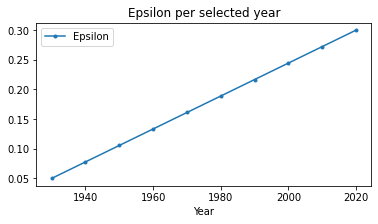

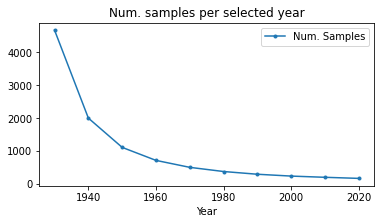

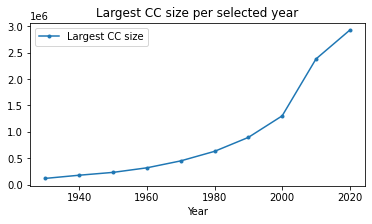

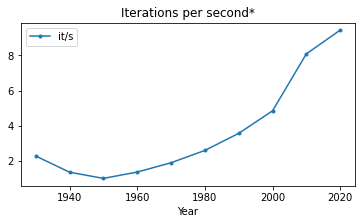

In [44]:
data_df = pd.DataFrame(data_tuples).rename(columns={0: "Year", 1: "Epsilon", 2: "Num. Samples", 3: "Largest CC size", 4: "it/s"})
data_df.plot.line(x="Year", y=["Epsilon"], title="Epsilon per selected year", figsize=(6,3), style='.-')
data_df.plot.line(x="Year", y=["Num. Samples"], title="Num. samples per selected year", figsize=(6,3), style='.-')
data_df.plot.line(x="Year", y=["Largest CC size"], title="Largest CC size per selected year", figsize=(6,3), style='.-')
data_df.plot.line(x="Year", y=["it/s"], title="Iterations per second*", figsize=(6,3), style='.-')


In [40]:
start = time.time()
centralities = closenessCentralityUpToYear(G, actor_nodes, 1930, epsilon=0.2)
end = time.time()
print(f"Elapsed: {end - start}")


4.14 ns ± 0.0225 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [37]:
print(topNActorsGivenCentralities(centralities, N=10))

<class 'pandas.core.series.Series'>
Index 1770044, centr: 0.2192973099654731
Index 2369141, centr: 0.21739037683533854
Index 1310353, centr: 0.21739037683533854
Index 279530, centr: 0.21739037683533854
Index 69410, centr: 0.2155163218626201
Index 1214825, centr: 0.2155163218626201
Index 1075162, centr: 0.2155163218626201
Index 2389455, centr: 0.2155163218626201
Index 796332, centr: 0.21367430201764048
Index 564256, centr: 0.21367430201764048
Index 1434803, centr: 0.21367430201764048
Index 1262030, centr: 0.21367430201764048
['Flowers, Bess', 'Steers, Larry', 'Corrado, Gino', 'Bacon, Irving', 'Sarno, Hector', 'Phelps, Lee (I)', 'Lewis, Mitchell (I)', 'Harris, Sam (II)', 'Vogan, Emmett', 'Shumway, Lee']


In [ ]:
centralities

In [ ]:
nx_centr

In [65]:
topTenGivenCentralities(centralities)

          0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  \
169727   18  17  17  17  16  17  16  16  15  17  17  15  17  15  14   
1677454  18  17  17  17  16  17  16  16  15  17  17  15  17  15  14   
1682097  18  17  17  17  16  17  16  16  15  17  17  15  17  15  14   
143486   18  17  17  17  16  17  16  16  15  17  17  15  17  15  14   
2309179  18  17  17  17  16  17  16  16  15  17  17  15  17  15  14   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1146815   6   3   5   5   6   7   2   4   5   5   5   3   5   3   4   
2420989   7   4   6   4   5   6   3   3   4   4   4   2   6   4   5   
2389455   7   4   6   6   5   6   3   3   6   2   4   2   6   2   5   
2368131   7   4   6   4   5   6   3   3   4   4   4   2   6   4   5   
2369141   5   4   6   4   5   6   3   3   4   4   4   2   6   4   5   

         centrality  
169727     0.061475  
1677454    0.061475  
1682097    0.061475  
143486     0.061475  
2309179    0.061475  
...            

In [142]:
#distances_df = pd.DataFrame(sssp).T
#n = 5
#distances_df['centrality'] = distances_df.mean(numeric_only=True, axis=1).apply(lambda x: 1/(x*(n/(n-1))))
                                                                         

In [143]:
distances_df

,0,1,2,avg,centrality
1130121,0,5,8,0.174545,0.242893
2421064,1,4,7,0.188235,0.262548
1442048,2,3,6,0.204255,0.285606
249220,2,5,8,0.152381,0.211188
885125,2,5,8,0.152381,0.211188
...,...,...,...,...,...
652618,16,17,18,0.046377,0.062688
1054028,16,17,18,0.046377,0.062688
1049459,16,17,18,0.046377,0.062688
143486,16,17,18,0.046377,0.062688


## Question 3
III) Which is the pair of movies that share the largest number of actors?

Main idea to solve this would be to do an intersection of the edges of each of the movies.

Doing the intersections of all sets can become very expensive timewise. 

Given an unordered set of sets $\hat{S} = \{S_1, .., S_N\}$ for any $N\in\mathbb{N}$ s.t. $|S_i| \leq M$ for any $i=1,..,N$ and $M \in\mathbb{N}$; finding the max intersection would cost $\mathcal{O}(N)$, and $\mathcal{O}(\min{\{|U_i|,|U_j|\}})$ (python documentation), reaching $\mathcal{O}(N*M)$. 

In this case I use the following simple observations: 
- For any two given sets $S_i \neq S_j$ (for $i\neq j = 1, .., N$) it is true that $|S_i \cap S_j| \leq \min \{|S_i|, |S_j|\}$
- Let $m$ be the maximum intersection found until a certain iteration. Then if $U_i$ (or $U_j$) is s.t. $|U_i|<m$ (or $|U_j|<m$) then necessarily $|U_i \cap U_j| < m$, i.e. it is not necessary to do the intersection to infer that the cardinality of that intersection would now surpass the current max. Therefore, it's possible to only check the cardinality and skip the calculation of the intersections.

With this heuristic, although the formal complexity would be essentially the same, in practice a lot of the intersections are skipped. 

In [22]:
def moviesWithMaxCommonNumActors(graph, mv_nodes):
    '''
    Calculates the couple of movies with the most common actors
    Arguments: 
        graph: IMDB graph with integer values
        mv_nodes: list of indices of the movies that are of type 'movie'
    Returns: 
        (movies1, movie2): solution of the problem
    Prints: 
        Number of common 'actors' between the two movies
        
    '''
    mv_act = nx.to_dict_of_lists(graph)
    print(mv_act[1])
    current_solution = (None, None)
    current_max = 0
    for movie in tqdm(mv_nodes):
        if len(mv_act[movie]) >= current_max:
            for second_movie in mv_nodes:
                if len(mv_act[second_movie]) >= current_max and movie != second_movie:
                    temp = len(set(mv_act[movie]).intersection(set(mv_act[second_movie])))
                    if current_max < temp:
                        current_solution = (movie, second_movie)
                        current_max = temp
                        
    print(f"Max: {current_max}")
    nodes_dt = G.nodes.data(True)
    
    return (nodes_dt[current_solution[0]]['original_name'], nodes_dt[current_solution[1]]['original_name'])

In [23]:
result = moviesWithMaxCommonNumActors(G, list(movies_nodes)) #2151046
print(result)

[2364798]


  0%|          | 0/745941 [00:00<?, ?it/s]

Current max: 194
('Kingdom Hearts II (2005) (VG)', 'Kingdom Hearts II: Final Mix+ (2007) (VG)')


In [253]:
result

(2384688, 2384689)

In [302]:
G[2384688]['']

AtlasView({7273: {}, 16140: {}, 27859: {}, 43138: {}, 45675: {}, 86123: {}, 111089: {}, 111114: {}, 112199: {}, 114441: {}, 126321: {}, 154713: {}, 158359: {}, 180610: {}, 188640: {}, 188935: {}, 190455: {}, 214999: {}, 220945: {}, 255630: {}, 259215: {}, 282296: {}, 285442: {}, 296874: {}, 334020: {}, 351536: {}, 361683: {}, 365989: {}, 383626: {}, 385666: {}, 399801: {}, 400863: {}, 415400: {}, 428456: {}, 432956: {}, 439521: {}, 453750: {}, 453944: {}, 456198: {}, 459964: {}, 460109: {}, 461304: {}, 467468: {}, 483998: {}, 485120: {}, 512300: {}, 513680: {}, 514089: {}, 535324: {}, 561524: {}, 569644: {}, 572970: {}, 596641: {}, 596780: {}, 597895: {}, 609500: {}, 629751: {}, 632931: {}, 632973: {}, 634510: {}, 635833: {}, 637352: {}, 637533: {}, 667110: {}, 669345: {}, 678955: {}, 681488: {}, 684511: {}, 685402: {}, 715117: {}, 727762: {}, 730088: {}, 738800: {}, 747808: {}, 766154: {}, 777569: {}, 780580: {}, 853394: {}, 858841: {}, 862219: {}, 863011: {}, 877573: {}, 877684: {}, 

## Question 4
Build also the actor graph, whose nodes are only actors and two actors are connected if they did a movie together. Answer to the following question:

Which is the pair of actors who collaborated the most among themselves?

In [12]:
bytm = df.loc[df['actor'] == 'Byron, Tom (I)']
nptrs = df.loc[df['actor'] == 'North, Peter (I)']

In [13]:
nptrs_set = set(nptrs['movie'])
bytm_set = set(bytm['movie'])

In [14]:
print(len(nptrs_set))
print(len(bytm_set))
print(f"Intersection is {len(nptrs_set.intersection(bytm_set))}")

1822
1882
Intersection is 420


In [2]:
# INIT

df = pd.read_csv('imdb_dataset.tsv', sep='\t', header=None, dtype=str)
edges = df.to_records(index=False)
df[2] = df[1].str.extract(r'(\(\d{4})', expand=True)#.str.replace("(", "").fillna(0).astype(int) #FIXME fillna is pretty ugly rn
df[2] = df[2].str.replace("(", "", regex=False).fillna(0).astype(int)
df = df.rename(columns={0: "actor", 1: "movie", 2: "year"})
df.loc[df['movie'] == 'Re']
df['movie'] = df['movie'].replace(['Re'],'Re ')
df['movie'] = df['movie'].replace(['Regen'], 'Regen ')


In [ ]:
df = initDF()
#actor_graph_dict = df.groupby('movie')['actor'].apply(list).to_dict()

In [4]:
actors = df.actor.unique()
actor_graph = nx.Graph()
actor_graph.add_nodes_from(actors)

In [18]:
def constructGraphAndFindMaxCollaborationGivenActorsGraph(imdb_df_f):
    '''
    Given IMDB dataset creates actor graph (weighted) and calculates the maximum number of collaborations
    Arguments:
        imdb_df_f: pandas dataframe of columns (actor, movie) 
    Returns:
        actor_graph: actor graph constructed
        mass: the maximum number of collaboration found
        sol: tuple of the two actors that collaborated the most
    '''
    actor_graph_dict = imdb_df_f.groupby('movie')['actor'].apply(list).to_dict()
    mass = 0
    sol = (None, None)
    i = 0
    for movie in tqdm(actor_graph_dict):
        current_actors_list = actor_graph_dict[movie]
        if i == 3:
            break
        i+=1
        for i in range(len(current_actors_list)):
            for j in range(i+1, len(current_actors_list)):
                if current_actors_list[i] != current_actors_list[j]: 
                    if not actor_graph.has_edge(current_actors_list[i], current_actors_list[j]):
                        actor_graph.add_edge(current_actors_list[i], current_actors_list[j], weight=1)
                    else:
                        actor_graph[current_actors_list[i]][current_actors_list[j]]['weight'] += 1
                        if actor_graph[current_actors_list[i]][current_actors_list[j]]['weight'] > mass:
                            mass = actor_graph[current_actors_list[i]][current_actors_list[j]]['weight']
                            sol = (current_actors_list[i], current_actors_list[j])
    return (actor_graph, mass, sol)
actor_graph, maximum, solution = constructGraphAndFindMaxCollaborationGivenActorsGraph(df)

In [5]:
mass = 0
sol = (None, None)
histogram_dict = {1:0}
for movie in tqdm(actor_graph_dict):
    current_actors_list = actor_graph_dict[movie]
    for i in range(len(current_actors_list)):
        for j in range(i+1, len(current_actors_list)):
            if current_actors_list[i] != current_actors_list[j]: #remove
                if not actor_graph.has_edge(current_actors_list[i], current_actors_list[j]):
                    actor_graph.add_edge(current_actors_list[i], current_actors_list[j], weight=1)
                    #hist[1] += 1
                else:
                    actor_graph[current_actors_list[i]][current_actors_list[j]]['weight'] += 1
                    if actor_graph[current_actors_list[i]][current_actors_list[j]]['weight'] > mass:
                        mass = actor_graph[current_actors_list[i]][current_actors_list[j]]['weight']
                        sol = (current_actors_list[i], current_actors_list[j])
                        #print(f"Current max: {mass}, {sol}")
print(mass)

  0%|          | 0/745941 [00:00<?, ?it/s]

Current max: 2, ('Duffy, Joe (II)', 'MacCarthy-Morrogh, James')
Current max: 3, ('Boreanaz, David', 'Hallett, Andy')
Current max: 4, ('Boreanaz, David', 'Manners, Kelly A.')
Current max: 5, ('Boreanaz, David', 'Richards, J. August')
Current max: 6, ('Brendon, Nicholas', 'Marsters, James')
Current max: 7, ('Brendon, Nicholas', 'Marsters, James')
Current max: 8, ('Bass, Lance', 'Chasez, J.C.')
Current max: 9, ('Bass, Lance', 'Chasez, J.C.')
Current max: 10, ('Tedeschi, Tony', 'Valentino (III)')
Current max: 11, ('Tedeschi, Tony', 'Valentino (III)')
Current max: 12, ('Tedeschi, Tony', 'Valentino (III)')
Current max: 13, ('Tedeschi, Tony', 'Valentino (III)')
Current max: 14, ('Hefner, Hugh M.', 'Lee, Christopher (I)')
Current max: 15, ('Hefner, Hugh M.', 'Lee, Christopher (I)')
Current max: 16, ('Hefner, Hugh M.', 'Lee, Christopher (I)')
Current max: 17, ('Hefner, Hugh M.', 'Lee, Christopher (I)')
Current max: 18, ('Hefner, Hugh M.', 'Lee, Christopher (I)')
Current max: 19, ('Hefner, Hugh 

Current max: 154, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 155, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 156, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 157, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 158, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 159, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 160, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 161, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 162, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 163, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 164, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 165, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 166, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 167, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 168, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 169, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 170, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 171, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 172, ('Byron, T

Current max: 306, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 307, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 308, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 309, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 310, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 311, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 312, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 313, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 314, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 315, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 316, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 317, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 318, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 319, ('Byron, Tom (I)', 'Wallice, Marc')
Current max: 320, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 321, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 322, ('Byron, Tom (I)', 'North, Peter (I)')
Current max: 323, ('Byron, Tom (I)

In [6]:
print(mass, sol)
import pickle 
with open('q4_graph.pickle', 'wb') as file:
    pickle.dump(actor_graph, file, protocol=pickle.HIGHEST_PROTOCOL)

420 ('Byron, Tom (I)', 'North, Peter (I)')


In [5]:
import pickle
with open('q4_graph.pickle', 'rb') as file:
    G = pickle.load(file)

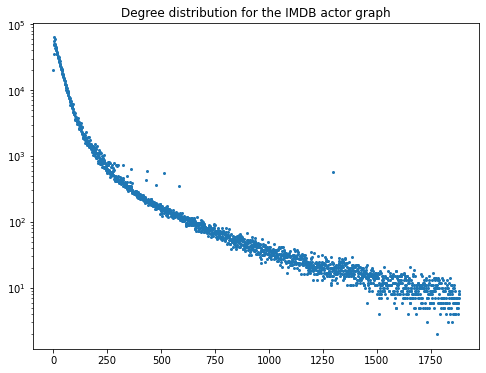

In [8]:
#print(G)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
degree_hist = nx.degree_histogram(G)
figure(figsize=(8, 6))
x_len = 1883
x = range(0,x_len)
y = np.array(degree_hist[0:x_len])
plt.title("Degree distribution for the IMDB actor graph")
plt.scatter(x, y, s=4)
plt.yscale('log')
plt.show()

In [51]:
archi = actor_graph.edges(data=True)
i = 0
sol = (None, None)
for arco in archi:
    print(arco[2])
    sol = (arco[0], arco[1])
    if i == 1: 
        break
    i+=1
print(sol)

{'weight': 1}
{'weight': 1}
('$, Homo', 'Anttila, Lauri')


In [60]:
def findMaxCollaborationGivenGraph(gr):
    '''
    Finds edge with max weight and returns the two nodes it connects. Also calculate the histogram of the weights. 
    Arguments: 
        gr: actor graph
    Retruns: 
        massimo: the found maximal edge
        sol: tuple representing the two actors with the most collaborations
        hist: a list representing the histogram of the edge weights
    '''
    archi = gr.edges(data=True)
    massimo = 0
    sol = (None, None)
    hist = [0]*500
    i = 0
    sol = (None, None)
    for arco in archi:
        curr_weight = arco[2]['weight']
        #print(curr_weight)
        if massimo < curr_weight:
            massimo =  curr_weight
            sol = (arco[0], arco[1])
            
        hist[curr_weight] += 1
        i+=1
        if i % 1000000 == 0:
            print(f"Iteration: {i}")
    return (massimo, sol, hist)

maximum, solution, hist = findMaxCollaborationGivenGraph(actor_graph)
pass
import pickle 
with open('q4_hist.pickle', 'wb') as file:
    pickle.dump(hist, file, protocol=pickle.HIGHEST_PROTOCOL)

Iteration: 1000000
Iteration: 2000000
Iteration: 3000000
Iteration: 4000000
Iteration: 5000000
Iteration: 6000000
Iteration: 7000000
Iteration: 8000000
Iteration: 9000000
Iteration: 10000000
Iteration: 11000000
Iteration: 12000000
Iteration: 13000000
Iteration: 14000000
Iteration: 15000000
Iteration: 16000000
Iteration: 17000000
Iteration: 18000000
Iteration: 19000000
Iteration: 20000000
Iteration: 21000000
Iteration: 22000000
Iteration: 23000000
Iteration: 24000000
Iteration: 25000000
Iteration: 26000000
Iteration: 27000000
Iteration: 28000000
Iteration: 29000000
Iteration: 30000000
Iteration: 31000000
Iteration: 32000000
Iteration: 33000000
Iteration: 34000000
Iteration: 35000000
Iteration: 36000000
Iteration: 37000000
Iteration: 38000000
Iteration: 39000000
Iteration: 40000000
Iteration: 41000000
Iteration: 42000000
Iteration: 43000000
Iteration: 44000000
Iteration: 45000000
Iteration: 46000000
Iteration: 47000000
Iteration: 48000000
Iteration: 49000000
Iteration: 50000000
Iteration

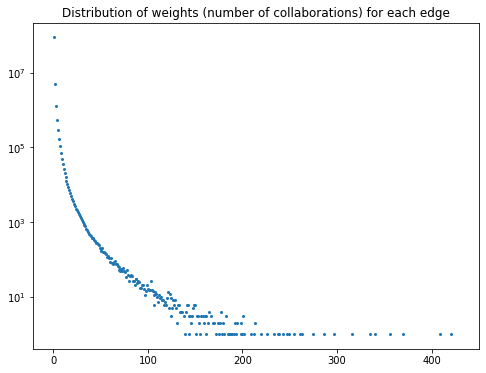

In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6))

x = range(0,430)
y = np.array(hist[0:430])
plt.title("Distribution of weights (number of collaborations) for each edge")
plt.scatter(x, y, s=4)
plt.yscale('log')
plt.show()

### Notes
- [NetworkX docs on bipartite graphs](https://networkx.org/documentation/stable/reference/algorithms/bipartite.html) However, if the input graph is not connected, there are more than one possible colorations. This is the reason why we require the user to pass a container with all nodes of one bipartite node set as an argument to most bipartite functions.
- Networkx uses a dictionary of dictionaries of dictionaries, as specified in the docs. NetworkX uses a “dictionary of dictionaries of dictionaries” as the basic network data structure. This allows fast lookup with reasonable storage for large sparse networks. The keys are nodes so G[u] returns an adjacency dictionary keyed by neighbor to the edge attribute dictionary. A view of the adjacency data structure is provided by the dict-like object G.adj as e.g. for node, nbrsdict in G.adj.items():. The expression G[u][v] returns the edge attribute dictionary itself. A dictionary of lists would have also been possible, but not allow fast edge detection nor convenient storage of edge data.